### <font color = yellow>I.) Remove Constant Feature by VarianceThreshold

VarianceThreshold is a feature selection method in scikit-learn that removes low-variance features from a dataset. It is a simple yet effective method for reducing the number of features and improving the performance of machine learning models, especially for high-dimensional datasets with many irrelevant or redundant features.

The VarianceThreshold class in scikit-learn works by removing all features whose variance does not meet a certain threshold. By default, it removes all features with zero variance, i.e., features that have the same value for all samples. This is a common scenario for binary features, such as dummy variables or one-hot encoded variables.

<font color = yellow>*Useful </font>: The VarianceThreshold method is useful for feature selection by removing low-variance features. The method considers the variance of each feature in the dataset, and removes those features whose variance falls below a specified threshold. This is a simple yet effective way to reduce the dimensionality of a dataset and improve model performance, since low-variance features are less likely to have a significant impact on the target variable. By removing such features, the remaining features become more informative, leading to better predictions and model interpretability. Additionally, removing low-variance features can also reduce the computational complexity and memory requirements of the model. Overall, the VarianceThreshold method is a useful tool for preprocessing and feature selection in machine learning.

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import VarianceThreshold

# Load the Breast Cancer dataset
data = load_breast_cancer()

# Create a VarianceThreshold object and fit it to the dataset
selector = VarianceThreshold()
selector.fit(data.data)

# Get the indices of the selected features
selected_features = selector.get_support(indices=True)

# Print the number of remaining features and their indices
print(f"Number of remaining features: {len(selected_features)}")
print(f"Indices of remaining features: {selected_features}")

Number of remaining features: 30
Indices of remaining features: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]


In [4]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

In [5]:
df = pd.read_csv('sample.csv')
df

,Length,width,size,decimal,weight,height
0,5.1,3.5,1.4,0.2,5,148
1,4.9,3.0,1.4,0.2,5,193
2,4.7,3.2,1.3,0.2,5,182
3,4.6,3.1,1.5,0.2,5,170
4,5.0,3.6,1.4,0.2,5,140
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,5,192
146,6.3,2.5,5.0,1.9,5,140
147,6.5,3.0,5.2,2.0,5,149
148,6.2,3.4,5.4,2.3,5,189


In [6]:
df.head()

,Length,width,size,decimal,weight,height
0,5.1,3.5,1.4,0.2,5,148
1,4.9,3.0,1.4,0.2,5,193
2,4.7,3.2,1.3,0.2,5,182
3,4.6,3.1,1.5,0.2,5,170
4,5.0,3.6,1.4,0.2,5,140


In [7]:
df.tail()

,Length,width,size,decimal,weight,height
145,6.7,3.0,5.2,2.3,5,192
146,6.3,2.5,5.0,1.9,5,140
147,6.5,3.0,5.2,2.0,5,149
148,6.2,3.4,5.4,2.3,5,189
149,5.9,3.0,5.1,1.8,5,189


In [8]:
df.shape

(150, 6)

In [9]:
df['weight'].value_counts() # it will show the value and occurring time of that value.

5    150
Name: weight, dtype: int64

In [10]:
x = df.iloc[:,0:5]
y = df.iloc[:,-1]

In [11]:
x

,Length,width,size,decimal,weight
0,5.1,3.5,1.4,0.2,5
1,4.9,3.0,1.4,0.2,5
2,4.7,3.2,1.3,0.2,5
3,4.6,3.1,1.5,0.2,5
4,5.0,3.6,1.4,0.2,5
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,5
146,6.3,2.5,5.0,1.9,5
147,6.5,3.0,5.2,2.0,5
148,6.2,3.4,5.4,2.3,5


In [12]:
y

0      148
1      193
2      182
3      170
4      140
      ... 
145    192
146    140
147    149
148    189
149    189
Name: height, Length: 150, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=123)

In [14]:
selector = VarianceThreshold(threshold=0)
selector

VarianceThreshold(threshold=0)

In [15]:
selector.fit(x_train)

VarianceThreshold(threshold=0)

In [16]:
selector.get_support()

array([ True,  True,  True,  True, False])

In [17]:
x_train.head()

,Length,width,size,decimal,weight
114,5.8,2.8,5.1,2.4,5
136,6.3,3.4,5.6,2.4,5
53,5.5,2.3,4.0,1.3,5
19,5.1,3.8,1.5,0.3,5
38,4.4,3.0,1.3,0.2,5


<font color = yellow> We remove the feature weight because it has variance = 0

In [18]:
df.drop("weight",axis=1)

,Length,width,size,decimal,height
0,5.1,3.5,1.4,0.2,148
1,4.9,3.0,1.4,0.2,193
2,4.7,3.2,1.3,0.2,182
3,4.6,3.1,1.5,0.2,170
4,5.0,3.6,1.4,0.2,140
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,192
146,6.3,2.5,5.0,1.9,140
147,6.5,3.0,5.2,2.0,149
148,6.2,3.4,5.4,2.3,189


### <font color = yellow>II.) Remove Multicolinearity

Multicollinearity is a phenomenon in which two or more independent variables in a regression model are highly correlated, which can lead to unreliable and unstable estimates of regression coefficients. There are several ways to address multicollinearity:
+ Remove one of the correlated variables: If two or more variables are highly correlated, you can remove one of them from the model. The choice of which variable to remove should be based on domain knowledge and the specific research question.
+ Combine the correlated variables: If two or more variables are measuring the same underlying concept, you can combine them into a single variable using methods such as principal component analysis (PCA).
+ Regularization methods: Regularization techniques, such as ridge regression and lasso regression, can help to reduce the impact of multicollinearity by shrinking the coefficients of correlated variables towards zero.
+ Increase sample size: Increasing the sample size can help to reduce the impact of multicollinearity by increasing the precision of the estimates.
+ Use other modeling techniques: Other modeling techniques, such as decision trees and random forests, are less affected by multicollinearity and can be used as an alternative to regression models.
+ It's important to note that multicollinearity is not always a problem and can sometimes be ignored if the goal is only to make predictions. However, if the goal is to interpret the coefficients of the regression model, then multicollinearity should be addressed.

It mean that there are two or more of high correlation coefficient between two or more feature(independent variables), So this method will help us to make dicission which correltions should be remove base on our goal

Multicollinearity is a situation in which two or more independent variables in a regression model are highly correlated with each other. This can create problems in the model, including:

- Reducing the precision of the coefficients: When two or more independent variables are highly correlated, it becomes difficult for the model to determine the exact contribution of each variable to the dependent variable. This leads to less precise coefficient estimates.
- Significance of individual variables: Multicollinearity can make it difficult to determine the significance of individual independent variables in the model. This can lead to incorrect conclusions about the importance of a particular variable in predicting the outcome.
- Instability of coefficients: Multicollinearity can cause the coefficients to become unstable, meaning they can vary significantly with small changes in the data.

Therefore, it is important to identify and remove multicollinearity in a regression model to improve the accuracy and reliability of the model's predictions.

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
df2 = pd.read_csv('train.csv')
df2

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [21]:
df2.T

,0,1,2,3,4,5,6,7,8,9,...,1450,1451,1452,1453,1454,1455,1456,1457,1458,1459
Id,1,2,3,4,5,6,7,8,9,10,...,1451,1452,1453,1454,1455,1456,1457,1458,1459,1460
MSSubClass,60,20,60,70,60,50,20,60,50,190,...,90,20,180,20,20,60,20,70,20,20
MSZoning,RL,RL,RL,RL,RL,RL,RL,RL,RM,RL,...,RL,RL,RM,RL,FV,RL,RL,RL,RL,RL
LotFrontage,65.0,80.0,68.0,60.0,84.0,85.0,75.0,NaN,51.0,50.0,...,60.0,78.0,35.0,90.0,62.0,62.0,85.0,66.0,68.0,75.0
LotArea,8450,9600,11250,9550,14260,14115,10084,10382,6120,7420,...,9000,9262,3675,17217,7500,7917,13175,9042,9717,9937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,2,5,9,2,12,10,8,11,4,1,...,9,5,5,7,10,8,2,5,4,6
YrSold,2008,2007,2008,2006,2008,2009,2007,2009,2008,2008,...,2009,2009,2006,2006,2009,2007,2010,2010,2010,2008
SaleType,WD,WD,WD,WD,WD,WD,WD,WD,WD,WD,...,WD,New,WD,WD,WD,WD,WD,WD,WD,WD
SaleCondition,Normal,Normal,Normal,Abnorml,Normal,Normal,Normal,Normal,Abnorml,Normal,...,Normal,Partial,Normal,Abnorml,Normal,Normal,Normal,Normal,Normal,Normal


In [22]:
df2.shape

(1460, 81)

In [23]:
df2.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [24]:
df2.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [25]:
num = ['int64','float64']
num_vars = list(df2.select_dtypes(include=num))

In [26]:
num_vars

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [27]:
df2 = df2[num_vars]

In [28]:
df2.shape

(1460, 38)

In [29]:
df2.isna().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [30]:
df2.dropna(inplace=True)

C:\Users\LH\AppData\Local\Temp\ipykernel_10600\1761232742.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(inplace=True)


In [31]:
x0 = df2.iloc[:,1:37]
y0 = df2.iloc[:,-1]

In [32]:
x.head()

,Length,width,size,decimal,weight
0,5.1,3.5,1.4,0.2,5
1,4.9,3.0,1.4,0.2,5
2,4.7,3.2,1.3,0.2,5
3,4.6,3.1,1.5,0.2,5
4,5.0,3.6,1.4,0.2,5


In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x0_train,x0_test,y0_train,y0_test = train_test_split(x0,y0,test_size=0.3,random_state=123)

In [35]:
x0_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
1102,20,70.0,7000,5,7,1960,2002,45.0,588,0,...,254,0,16,0,0,0,0,0,4,2007
1434,20,80.0,17400,5,5,1977,1977,0.0,936,0,...,484,295,41,0,0,0,0,0,5,2006
1308,20,100.0,12000,5,7,1948,2005,0.0,144,608,...,528,0,36,0,0,0,0,0,5,2008
1291,160,21.0,1680,5,7,1972,1972,268.0,231,0,...,264,185,0,0,0,0,0,0,2,2009
1191,160,24.0,2645,8,5,1999,2000,456.0,0,0,...,492,206,0,0,0,0,0,0,11,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,60,72.0,7226,7,5,2003,2003,0.0,0,0,...,595,0,45,0,0,0,0,0,6,2008
150,20,120.0,10356,5,6,1975,1975,0.0,716,0,...,440,0,0,0,0,0,0,0,1,2007
123,120,55.0,7892,6,5,1993,1993,0.0,300,0,...,530,0,63,0,0,0,0,0,3,2008
139,60,65.0,15426,6,5,1997,1997,0.0,821,0,...,470,276,99,0,0,0,0,0,8,2009


In [36]:
corrmatrix = x0_train.corr()
corrmatrix

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
MSSubClass,1.000000,-0.373365,-0.190276,0.014251,-0.105789,0.014663,-0.008071,0.046224,-0.057171,-0.078408,...,-0.101711,-0.014741,0.006214,-0.039449,-0.039801,0.003497,-0.002726,-0.053662,0.002031,-0.016855
LotFrontage,-0.373365,1.000000,0.420596,0.252105,-0.038383,0.120351,0.105538,0.203295,0.249217,0.012191,...,0.364330,0.072335,0.161569,-0.015605,0.054766,0.061464,0.203846,0.018122,0.041333,0.026420
LotArea,-0.190276,0.420596,1.000000,0.145355,-0.027863,0.022528,0.016994,0.077379,0.194078,0.171690,...,0.169722,0.072660,0.075159,-0.037523,0.001062,0.041802,0.102577,0.019434,0.013348,-0.006040
OverallQual,0.014251,0.252105,0.145355,1.000000,-0.147098,0.600529,0.584658,0.441108,0.241882,-0.064853,...,0.544133,0.235088,0.374683,-0.147751,0.043201,0.085612,0.084670,-0.063583,0.077596,-0.021838
OverallCond,-0.105789,-0.038383,-0.027863,-0.147098,1.000000,-0.390851,0.053427,-0.159888,-0.039418,0.078553,...,-0.234208,-0.021581,-0.098947,0.052252,0.003765,0.099132,-0.006591,0.089637,-0.045778,0.017240
YearBuilt,0.014663,0.120351,0.022528,0.600529,-0.390851,1.000000,0.648258,0.327696,0.232823,-0.058076,...,0.493885,0.259378,0.266632,-0.387420,0.036824,-0.046956,0.032473,-0.069130,0.013960,-0.014569
YearRemodAdd,-0.008071,0.105538,0.016994,0.584658,0.053427,0.648258,1.000000,0.193305,0.130970,-0.024989,...,0.420655,0.241116,0.278950,-0.189435,0.024659,0.002096,0.021084,-0.026247,0.004994,0.029741
MasVnrArea,0.046224,0.203295,0.077379,0.441108,-0.159888,0.327696,0.193305,1.000000,0.246186,-0.079651,...,0.407250,0.160831,0.152355,-0.123434,0.030731,0.044185,0.037996,-0.043151,0.016933,-0.003551
BsmtFinSF1,-0.057171,0.249217,0.194078,0.241882,-0.039418,0.232823,0.130970,0.246186,1.000000,-0.020668,...,0.288692,0.204427,0.130873,-0.121206,0.025699,0.053995,0.223945,0.011615,-0.025177,0.029664
BsmtFinSF2,-0.078408,0.012191,0.171690,-0.064853,0.078553,-0.058076,-0.024989,-0.079651,-0.020668,1.000000,...,-0.057705,0.018286,-0.031150,0.087648,-0.029214,0.035072,0.071979,0.041856,-0.041137,0.041455


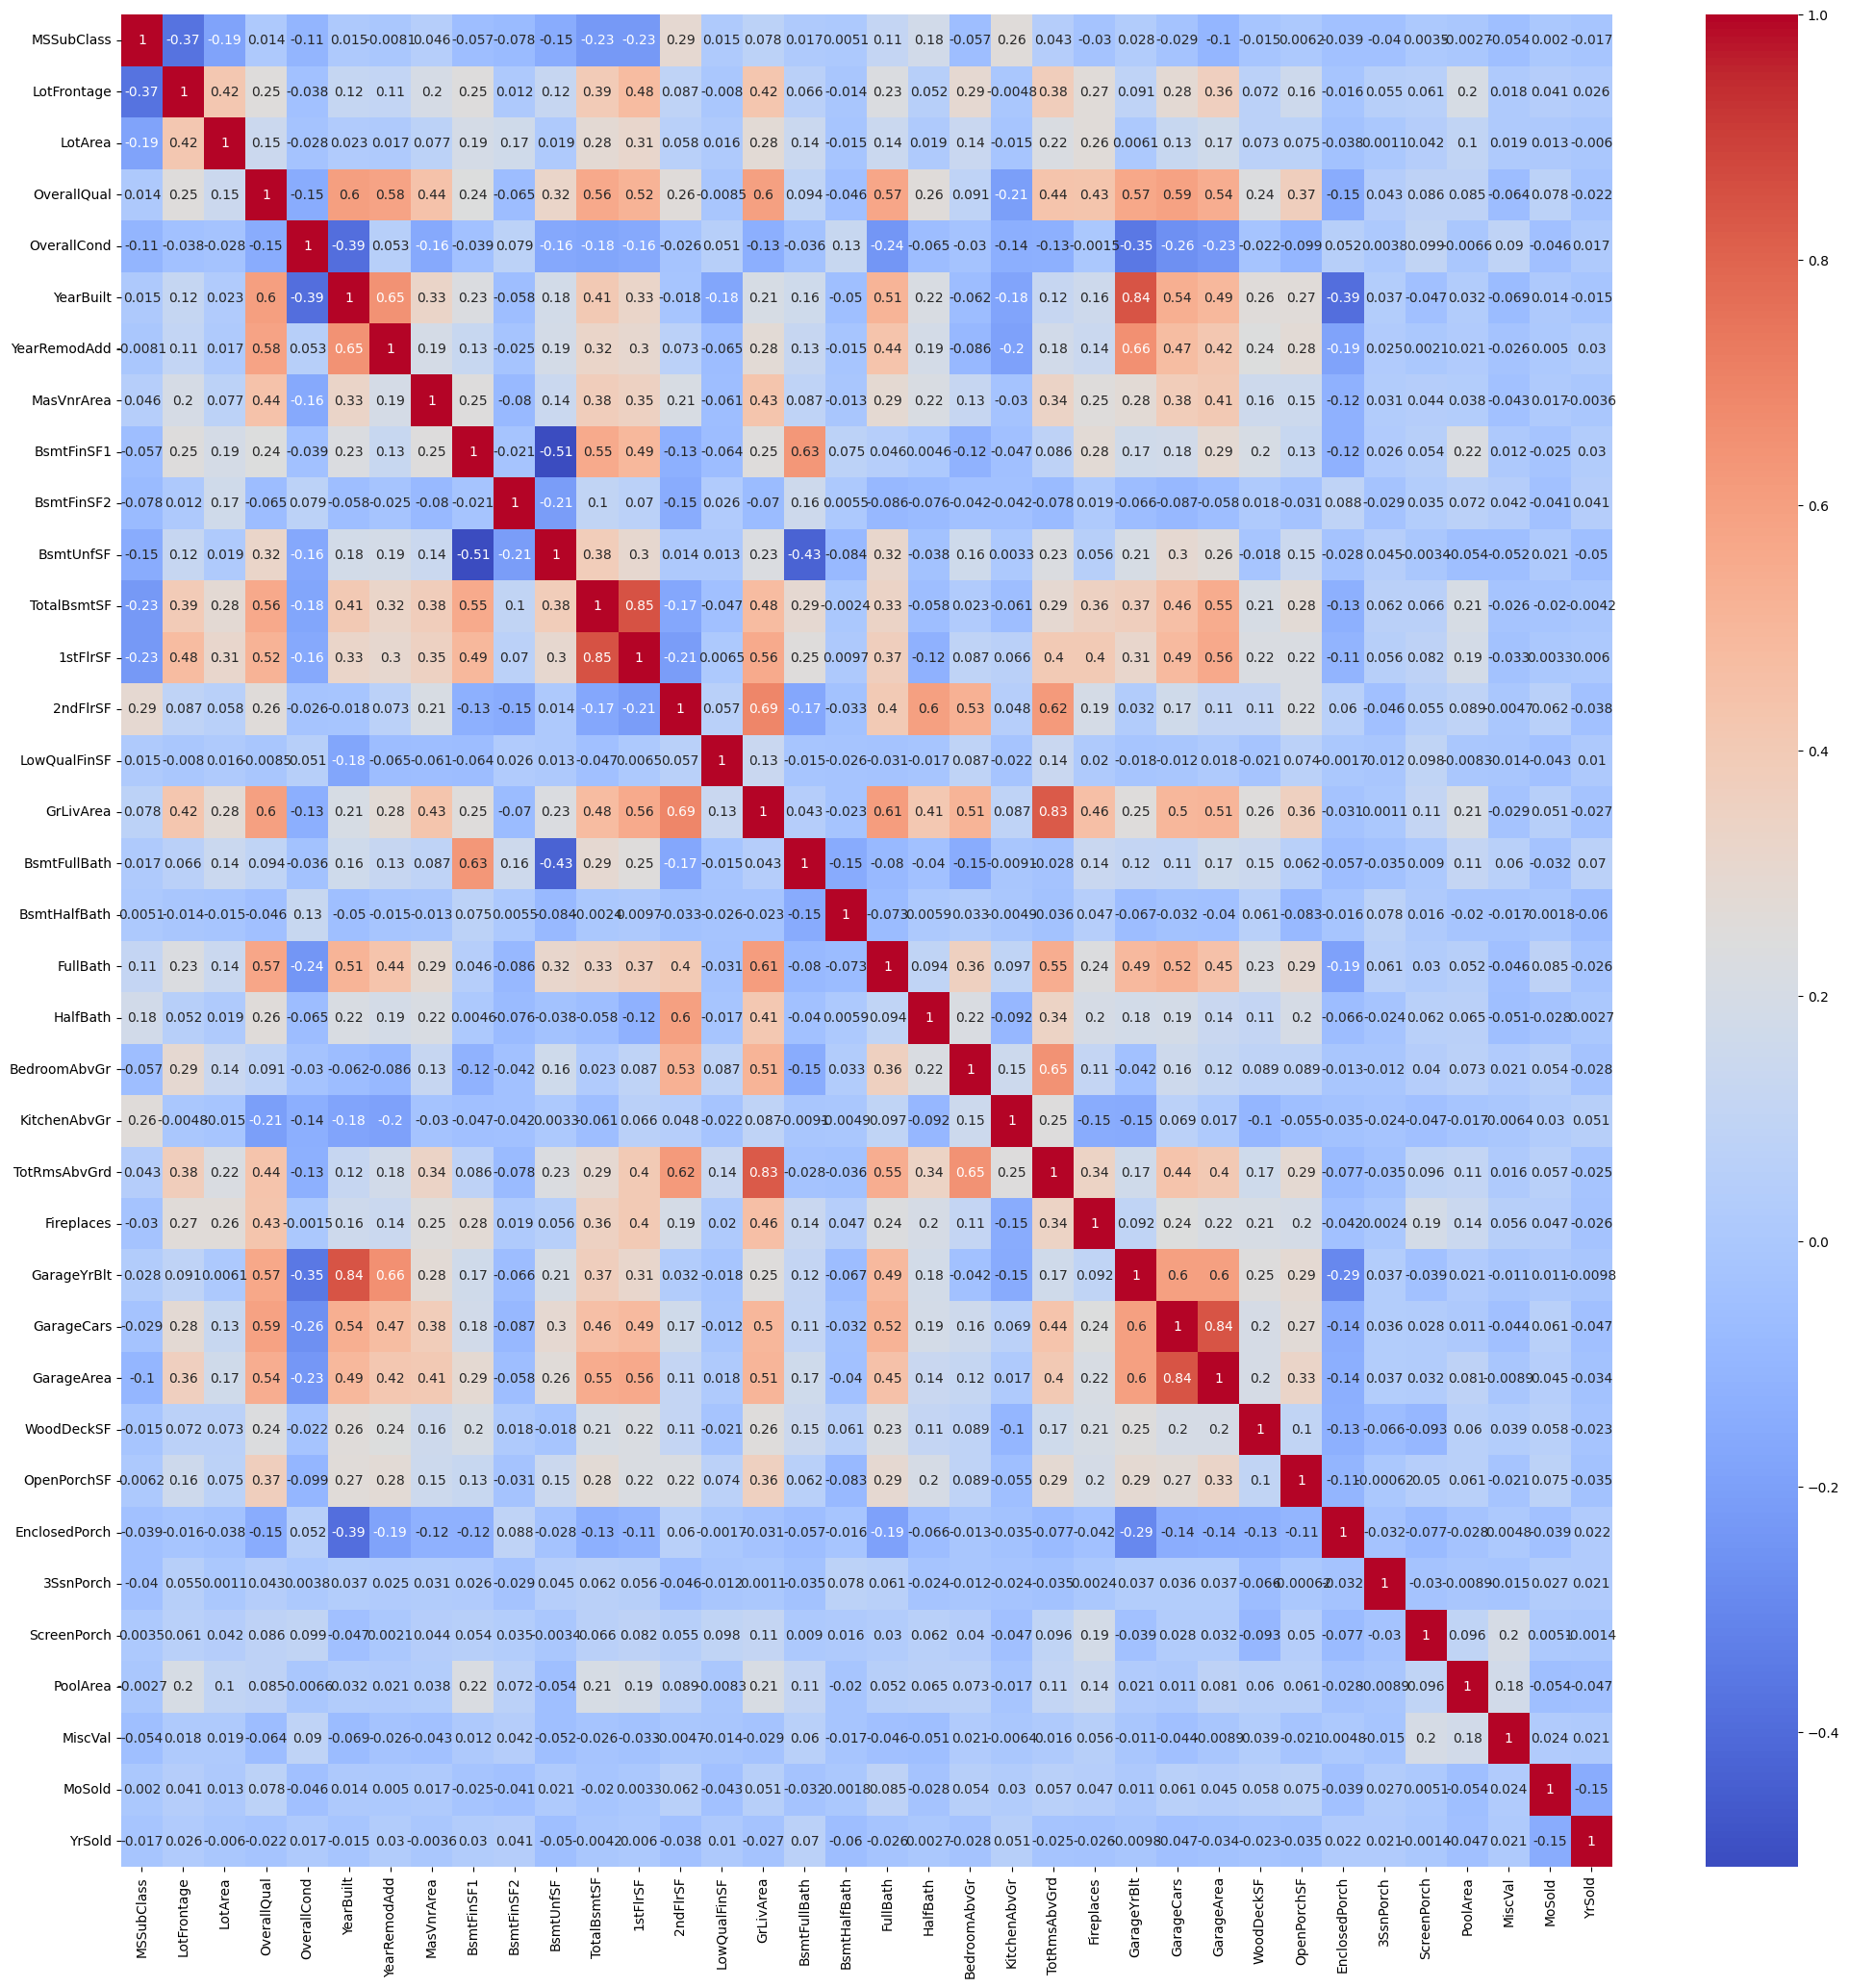

In [37]:
correlation = x0_train.corr()
f,ax = plt.subplots(figsize=(25,25))
sns.heatmap(correlation,annot=True,cmap='coolwarm')
plt.show()

In [38]:
def correlation(df,threshold):
  correlated_cols = set()
  corrmatrix = df.corr()
  for i in range(len(corrmatrix.columns)):
    for j in range(i):
      if abs(corrmatrix.iloc[i,j])>threshold:
        colname = corrmatrix.columns[i]
        correlated_cols.add(colname)
  return correlated_cols

<font color = yellow>show the features that exist correlation coefficient >= 0.6

In [39]:
corr_feature = correlation(x0_train,0.6) 
corr_feature

{'1stFlrSF',
 'BsmtFullBath',
 'FullBath',
 'GarageArea',
 'GarageYrBlt',
 'GrLivArea',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd'}

In [40]:
x0_train.shape,x0_test.shape

((784, 36), (337, 36))

<font color = yellow>Remove the features that exist correlation coefficient >= 0.6

In [41]:
x0_train.drop(labels=corr_feature,axis=1,inplace=True)
x0_test.drop(labels=corr_feature,axis=1,inplace=True)

In [42]:
x0_train.shape,x0_test.shape

((784, 27), (337, 27))

In [43]:
x0_train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
1102,20,70.0,7000,5,7,45.0,588,0,422,1010,...,1,0,16,0,0,0,0,0,4,2007
1434,20,80.0,17400,5,5,0.0,936,0,190,1126,...,2,295,41,0,0,0,0,0,5,2006
1308,20,100.0,12000,5,7,0.0,144,608,172,924,...,2,0,36,0,0,0,0,0,5,2008
1291,160,21.0,1680,5,7,268.0,231,0,399,630,...,1,185,0,0,0,0,0,0,2,2009
1191,160,24.0,2645,8,5,456.0,0,0,776,776,...,2,206,0,0,0,0,0,0,11,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,60,72.0,7226,7,5,0.0,0,0,798,798,...,2,0,45,0,0,0,0,0,6,2008
150,20,120.0,10356,5,6,0.0,716,0,253,969,...,2,0,0,0,0,0,0,0,1,2007
123,120,55.0,7892,6,5,0.0,300,0,899,1199,...,2,0,63,0,0,0,0,0,3,2008
139,60,65.0,15426,6,5,0.0,821,0,107,928,...,2,276,99,0,0,0,0,0,8,2009


In [44]:
feature = x0_train.columns
print(feature)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtHalfBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'Fireplaces', 'GarageCars', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')


## <font color = yellow> Chi-Squared test(continuous random variable or categorical variable)

The Chi-Squared test is a statistical method that is useful in determining whether two categorical variables are related or not. It helps to understand whether there is a significant association between the variables, and if there is, the strength of the association.

The Chi-Squared test can be used in feature selection, where we can use it to determine which features in a dataset are most important in predicting a target variable. By calculating the Chi-Squared statistic for each feature and the target variable, we can determine the degree of association between them. This information can then be used to select the most relevant features for a predictive model.

Another application of the Chi-Squared test is in hypothesis testing. For example, in social science research, the Chi-Squared test can be used to test whether two groups of people differ significantly in their opinions or behaviors.

In summary, the Chi-Squared test is useful in various fields, including feature selection, hypothesis testing, and social science research.

The chi-squared test is a statistical test used to determine whether there is a significant association between two categorical variables. It is based on the difference between the expected frequencies and the observed frequencies in one or more categories. The null hypothesis of the test is that there is no association between the two variables.

The chi-squared test can be performed using the scipy.stats module in Python. Here's an example:

Suppose we have a dataset containing information about the gender and smoking status of a group of people. We want to determine if there is an association between gender and smoking status

In [45]:
import numpy as np
from scipy.stats import chi2_contingency

# Create the contingency table
data = np.array([
                  [100, 50], 
                  [150, 200]
                  ])

# Perform the chi-squared test
chi2_stat, p_val, dof, expected = chi2_contingency(data)

# Print the results
print("Chi-squared statistic:", chi2_stat)
print("P-value:", p_val)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

Chi-squared statistic: 22.866666666666667
P-value: 1.7363711244846524e-06
Degrees of freedom: 1
Expected frequencies:
 [[ 75.  75.]
 [175. 175.]]


In [46]:
from sklearn.feature_selection import chi2
df1 = pd.read_csv('data.csv')
df1

,MSZoning,Street,LotShape,LandContour,Utilities
0,RL,Pave,Reg,Lvl,AllPub
1,RL,Pave,Reg,Lvl,AllPub
2,RL,Pave,IR1,Lvl,AllPub
3,RL,Pave,IR1,Lvl,AllPub
4,RL,Pave,IR1,Lvl,AllPub
...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub
1456,RL,Pave,Reg,Lvl,AllPub
1457,RL,Pave,Reg,Lvl,AllPub
1458,RL,Pave,Reg,Lvl,AllPub


In [47]:
df1.describe()

,MSZoning,Street,LotShape,LandContour,Utilities
count,1460,1460,1460,1460,1460
unique,5,2,4,4,2
top,RL,Pave,Reg,Lvl,AllPub
freq,1151,1454,925,1311,1459


In [48]:
df1.dtypes

MSZoning       object
Street         object
LotShape       object
LandContour    object
Utilities      object
dtype: object

In [49]:
df1.isna().sum()

MSZoning       0
Street         0
LotShape       0
LandContour    0
Utilities      0
dtype: int64

In [50]:
# display the number of categories of each feature
df1.nunique()

MSZoning       5
Street         2
LotShape       4
LandContour    4
Utilities      2
dtype: int64

In [51]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
df1.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities'], dtype='object')

In [52]:
enc.fit(df1[['MSZoning','Street','LotShape','LandContour','Utilities']])

OrdinalEncoder()

In [53]:
# transform string to numeric variable type
df1[['MSZoning','Street','LotShape','LandContour','Utilities']] = enc.transform(df1[['MSZoning','Street','LotShape','LandContour','Utilities']])
df1.head()

,MSZoning,Street,LotShape,LandContour,Utilities
0,3.0,1.0,3.0,3.0,0.0
1,3.0,1.0,3.0,3.0,0.0
2,3.0,1.0,0.0,3.0,0.0
3,3.0,1.0,0.0,3.0,0.0
4,3.0,1.0,0.0,3.0,0.0


In [54]:
x1 = df1.iloc[:,0:4] # display the first 4 rows in data set
y1 = df1.iloc[:,-1]  # display the last one row in data set
x1.head()

,MSZoning,Street,LotShape,LandContour
0,3.0,1.0,3.0,3.0
1,3.0,1.0,3.0,3.0
2,3.0,1.0,0.0,3.0
3,3.0,1.0,0.0,3.0
4,3.0,1.0,0.0,3.0


In [55]:
y1.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Utilities, dtype: float64

In [56]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test = train_test_split(x1,y1,test_size=0.3,random_state=123)

In [57]:
f_score = chi2(x1_train,y1_train)
f_score

(array([4.09201735e-04, 2.40764978e-05, 1.99902057e+00, 2.11969360e-02]),
 array([0.98386091, 0.99608497, 0.15740089, 0.88424374]))

In [58]:
f_score[0]

array([4.09201735e-04, 2.40764978e-05, 1.99902057e+00, 2.11969360e-02])

In [59]:
p_values = pd.Series(f_score[1])
p_values.index = x1_train.columns
p_values

MSZoning       0.983861
Street         0.996085
LotShape       0.157401
LandContour    0.884244
dtype: float64

In [60]:
p_values.sort_values(ascending=False)

Street         0.996085
MSZoning       0.983861
LandContour    0.884244
LotShape       0.157401
dtype: float64

In [61]:
p_values.sort_values(ascending=True)

LotShape       0.157401
LandContour    0.884244
MSZoning       0.983861
Street         0.996085
dtype: float64

## <font color = yellow> Univariate Analysis(Mean Squared Error or MSE)

Univariate analysis is a statistical analysis technique that focuses on analyzing one variable at a time. In other words, it involves examining the distribution, central tendency, and variability of a single variable. This analysis is used to understand the characteristics of the data set and to identify patterns or trends that can be used to draw conclusions or make decisions.

Univariate analysis can be performed using a variety of statistical techniques, including measures of central tendency (e.g., mean, median, mode), measures of dispersion (e.g., range, variance, standard deviation), and graphical representations (e.g., histograms, box plots, stem-and-leaf plots).

Univariate analysis is often the first step in data analysis, and it is particularly useful when working with large data sets. By focusing on one variable at a time, analysts can quickly identify outliers, missing data, and other issues that may affect the quality of the data. This technique can also be used to compare data from different sources or to track changes in data over time.

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
df2 = pd.read_csv('saleprice.csv')
df2

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,...,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,...,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,...,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,...,366,0,112,0,0,0,0,4,2010,142125


In [64]:
df2.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [65]:
df2.shape

(1460, 37)

In [66]:
df2.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [67]:
df2.dtypes

MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

In [68]:
# checking missing values
df2.isna().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [69]:
df2.dropna(inplace=True)

In [70]:
x3 = df2.iloc[:,0:36]
y3 = df2.iloc[:,-1]
print(x3)

      MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0             60         65.0     8450            7            5       2003   
1             20         80.0     9600            6            8       1976   
2             60         68.0    11250            7            5       2001   
3             70         60.0     9550            7            5       1915   
4             60         84.0    14260            8            5       2000   
...          ...          ...      ...          ...          ...        ...   
1455          60         62.0     7917            6            5       1999   
1456          20         85.0    13175            6            6       1978   
1457          70         66.0     9042            7            9       1941   
1458          20         68.0     9717            5            6       1950   
1459          20         75.0     9937            5            6       1965   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFin

In [71]:
y3

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1121, dtype: int64

In [72]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [73]:
x3_train,x3_test,y3_train,y3_test = train_test_split(x3,y3,test_size=0.3,random_state=123)

In [74]:
mse_values = []
for feature in x3_train.columns:
  rf = RandomForestRegressor()
  rf.fit(x3_train,y3_train)
  y3_pred = rf.predict(x3_test)
  mse_values.append(mean_squared_error(y3_test,y3_pred))

In [75]:
mse_values

[1055935145.8155342,
 993926498.8424793,
 1004284234.0039045,
 1104812344.7515662,
 1032626270.4434385,
 1005742069.7335278,
 1019596396.6671355,
 1027173731.5025234,
 1020425108.8898234,
 1066068307.9274122,
 1006029581.1566864,
 1037715253.2423238,
 1040964688.3016944,
 980869217.8633579,
 1008780895.0985457,
 1082836753.390913,
 999593186.2078763,
 1037722375.8075165,
 1010360979.7079412,
 1012294856.4921697,
 1026074518.86597,
 1049424182.9905909,
 999125718.6941813,
 1032987411.4983457,
 1010430908.4813648,
 1029651769.9061772,
 1004897958.3884697,
 1021381309.0225903,
 951256631.7717623,
 1010902020.5675359,
 1020870568.4143231,
 1044182235.7674222,
 999338248.672923,
 1014258786.6593258,
 1031637059.7525554,
 937295986.3379265]

In [76]:
mse_values = pd.Series(mse_values)
mse_values.index = x3_train.columns
mse_values

MSSubClass       1.055935e+09
LotFrontage      9.939265e+08
LotArea          1.004284e+09
OverallQual      1.104812e+09
OverallCond      1.032626e+09
YearBuilt        1.005742e+09
YearRemodAdd     1.019596e+09
MasVnrArea       1.027174e+09
BsmtFinSF1       1.020425e+09
BsmtFinSF2       1.066068e+09
BsmtUnfSF        1.006030e+09
TotalBsmtSF      1.037715e+09
1stFlrSF         1.040965e+09
2ndFlrSF         9.808692e+08
LowQualFinSF     1.008781e+09
GrLivArea        1.082837e+09
BsmtFullBath     9.995932e+08
BsmtHalfBath     1.037722e+09
FullBath         1.010361e+09
HalfBath         1.012295e+09
BedroomAbvGr     1.026075e+09
KitchenAbvGr     1.049424e+09
TotRmsAbvGrd     9.991257e+08
Fireplaces       1.032987e+09
GarageYrBlt      1.010431e+09
GarageCars       1.029652e+09
GarageArea       1.004898e+09
WoodDeckSF       1.021381e+09
OpenPorchSF      9.512566e+08
EnclosedPorch    1.010902e+09
3SsnPorch        1.020871e+09
ScreenPorch      1.044182e+09
PoolArea         9.993382e+08
MiscVal   

In [77]:
# display from largest to smallest
mse_values.sort_values(ascending=False)

OverallQual      1.104812e+09
GrLivArea        1.082837e+09
BsmtFinSF2       1.066068e+09
MSSubClass       1.055935e+09
KitchenAbvGr     1.049424e+09
ScreenPorch      1.044182e+09
1stFlrSF         1.040965e+09
BsmtHalfBath     1.037722e+09
TotalBsmtSF      1.037715e+09
Fireplaces       1.032987e+09
OverallCond      1.032626e+09
MoSold           1.031637e+09
GarageCars       1.029652e+09
MasVnrArea       1.027174e+09
BedroomAbvGr     1.026075e+09
WoodDeckSF       1.021381e+09
3SsnPorch        1.020871e+09
BsmtFinSF1       1.020425e+09
YearRemodAdd     1.019596e+09
MiscVal          1.014259e+09
HalfBath         1.012295e+09
EnclosedPorch    1.010902e+09
GarageYrBlt      1.010431e+09
FullBath         1.010361e+09
LowQualFinSF     1.008781e+09
BsmtUnfSF        1.006030e+09
YearBuilt        1.005742e+09
GarageArea       1.004898e+09
LotArea          1.004284e+09
BsmtFullBath     9.995932e+08
PoolArea         9.993382e+08
TotRmsAbvGrd     9.991257e+08
LotFrontage      9.939265e+08
2ndFlrSF  

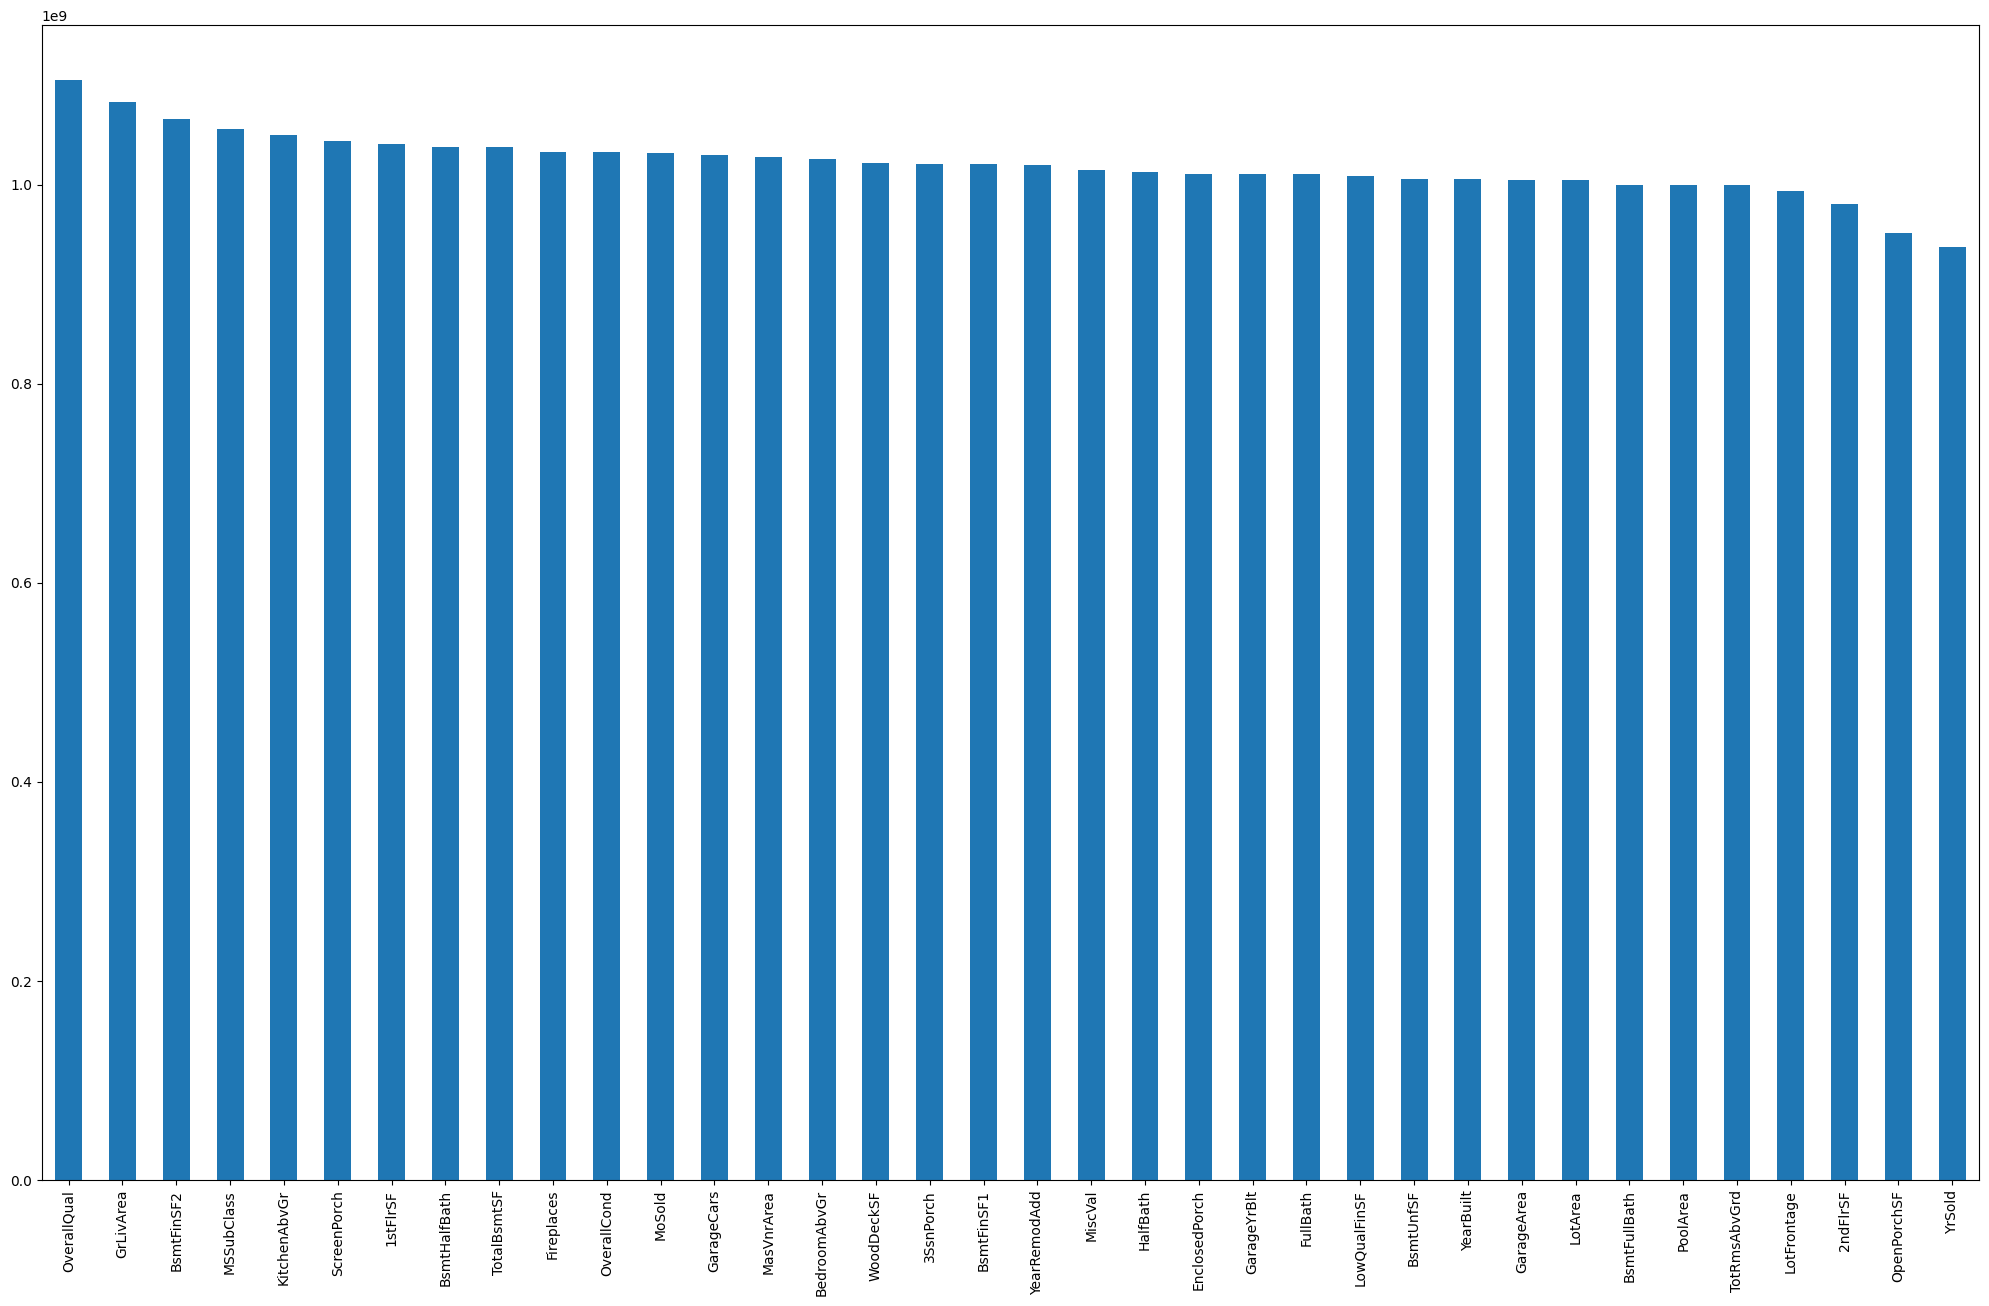

In [78]:
mse_values.sort_values(ascending=False).plot.bar(figsize=(25,15))
plt.show()

## <font color = yellow> Backward Elimination method

First analyse all of feature corresponding to target feature and then reduce one by one until achieve the best feature selection

Backward Elimination is a feature selection method that starts with all features included in the model, and then iteratively removes the least significant feature until a desired model performance is achieved or no further improvement can be made. It is a computationally efficient method and can lead to a simpler and more interpretable model.<br>
Here's an example of how to implement Backward Elimination using Python:

In [79]:
import statsmodels.api as sm
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

# Load Boston Housing dataset
boston = load_boston()

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.3, random_state=42)

# Add a column of ones for the intercept term
X_train = sm.add_constant(X_train)

# Fit Ordinary Least Squares (OLS) model
model = sm.OLS(y_train, X_train).fit()

# Perform backward elimination
while True:
    # Get p-values for all features
    p_values = model.pvalues[1:]
    
    # Find feature with highest p-value
    max_p_value = p_values.max()
    
    # If the highest p-value is above the threshold of 0.05, remove that feature and refit the model
    if max_p_value > 0.05:
        index = p_values.argmax()
        X_train = np.delete(X_train, index+1, 1)
        model = sm.OLS(y_train, X_train).fit()
    # Otherwise, break out of the loop
    else:
        break

# Print the summary of the final model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     107.9
Date:                Fri, 21 Apr 2023   Prob (F-statistic):           1.49e-94
Time:                        16:19:53   Log-Likelihood:                -1057.3
No. Observations:                 354   AIC:                             2135.
Df Residuals:                     344   BIC:                             2173.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.2755      6.022      5.193      0.0

c:\Users\LH\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Cal

In [80]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [81]:
df4 = pd.read_csv('wine.csv')
df4

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [82]:
df4.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [83]:
df4.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                         int64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                           int64
target                            int64
dtype: object

In [84]:
df4.shape

(178, 14)

In [85]:
x4 = df4.iloc[:,0:13]
y4 = df4.iloc[:,-1]

In [86]:
x4.shape

(178, 13)

In [87]:
y4.shape

(178,)

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
x4_train,x4_test,y4_train,y4_test = train_test_split(x4,y4,test_size=0.3,random_state=1)

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
backward_feature_selector = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1),k_features=8,forward=True,floating=False,verbose=2,scoring="accuracy",cv=5).fit(x4_train,y4_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:   16.0s finished

[2023-04-21 16:20:11] Features: 1/8 -- score: 0.782[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   11.6s finished

[2023-04-21 16:20:23] Features: 2/8 -- score: 0.9033333333333333[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:   11.0s finished

[2023-04-21 16:20:34] Features: 3/8 -- score: 0.9676666666666666[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | 

In [92]:
backward_feature_selector

SequentialFeatureSelector(estimator=RandomForestClassifier(n_jobs=-1),
                          k_features=(8, 8), scoring='accuracy', verbose=2)

In [93]:
backward_feature_selector.k_feature_idx_

(0, 1, 2, 4, 6, 9, 10, 11)

In [94]:
backward_feature_selector.k_feature_names_

('alcohol',
 'malic_acid',
 'ash',
 'magnesium',
 'flavanoids',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines')

In [95]:
backward_feature_selector.k_score_

0.992

In [96]:
backward_feature_selector = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1),k_features=8,forward=True,floating=False,verbose=2,scoring="accuracy",cv=5).fit(x4_train,y4_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:   11.0s finished

[2023-04-21 16:21:22] Features: 1/8 -- score: 0.782[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   13.0s finished

[2023-04-21 16:21:36] Features: 2/8 -- score: 0.9113333333333333[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:   10.9s finished

[2023-04-21 16:21:47] Features: 3/8 -- score: 0.9676666666666666[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | 

In [97]:
backward_feature_selector.k_feature_names_

('alcohol',
 'malic_acid',
 'alcalinity_of_ash',
 'magnesium',
 'flavanoids',
 'nonflavanoid_phenols',
 'color_intensity',
 'proline')

## <font color = yellow> Forward Selection method

Forward selection is a feature selection technique used in machine learning and statistical modeling to build a model by adding one feature at a time to the model until a desired level of accuracy is achieved. This method starts with an empty feature set, and in each iteration, it adds the feature that results in the best improvement in the model's performance, evaluated using some criteria like accuracy or AIC (Akaike information criterion).<br>
** select one by one from one feature until many features and select the best features corresponding to target<Br> 
Here is an example of performing forward selection on a dataset using Python:

In [98]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [99]:
df5 = pd.read_csv('wine.csv')
df5

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [100]:
df5.shape

(178, 14)

In [101]:
df5.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                         int64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                           int64
target                            int64
dtype: object

In [102]:
df5.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [103]:
df5[df5.isnull().any(axis=1)]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target


In [104]:
x5 = df5.iloc[:,0:13]
y5 = df5.iloc[:,-1]

In [105]:
print(x)
print(y)

     Length  width  size  decimal  weight
0       5.1    3.5   1.4      0.2       5
1       4.9    3.0   1.4      0.2       5
2       4.7    3.2   1.3      0.2       5
3       4.6    3.1   1.5      0.2       5
4       5.0    3.6   1.4      0.2       5
..      ...    ...   ...      ...     ...
145     6.7    3.0   5.2      2.3       5
146     6.3    2.5   5.0      1.9       5
147     6.5    3.0   5.2      2.0       5
148     6.2    3.4   5.4      2.3       5
149     5.9    3.0   5.1      1.8       5

[150 rows x 5 columns]
0      148
1      193
2      182
3      170
4      140
      ... 
145    192
146    140
147    149
148    189
149    189
Name: height, Length: 150, dtype: int64


In [106]:
x5_train,x5_test,y5_train,y5_test = train_test_split(x5,y5,test_size=0.3,random_state=123)

In [107]:
forward_feature_selection = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1),k_features=6,forward=True,floating=False,verbose=2,scoring="accuracy",cv=5).fit(x5_train,y5_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:   12.2s finished

[2023-04-21 16:22:35] Features: 1/6 -- score: 0.6843333333333332[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   10.5s finished

[2023-04-21 16:22:45] Features: 2/6 -- score: 0.9029999999999999[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    9.1s finished

[2023-04-21 16:22:55] Features: 3/6 -- score: 0.96[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | e

In [108]:
# the index of predictor selection
forward_feature_selection.k_feature_idx_

(1, 5, 6, 9, 10, 12)

In [109]:
# the names of significant predictors 
forward_feature_selection.k_feature_names_

('malic_acid',
 'total_phenols',
 'flavanoids',
 'color_intensity',
 'hue',
 'proline')

In [110]:
forward_feature_selection.k_score_

0.9676666666666666

In [111]:
pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(12,)","[0.6, 0.8, 0.76, 0.72, 0.5416666666666666]",0.684333,"(proline,)",0.125725,0.097818,0.048909
2,"(10, 12)","[0.92, 0.92, 0.96, 0.84, 0.875]",0.903,"(hue, proline)",0.053243,0.041425,0.020712
3,"(9, 10, 12)","[0.92, 1.0, 0.96, 0.92, 1.0]",0.96,"(color_intensity, hue, proline)",0.045984,0.035777,0.017889
4,"(5, 9, 10, 12)","[1.0, 1.0, 0.96, 0.92, 0.9583333333333334]",0.967667,"(total_phenols, color_intensity, hue, proline)",0.038597,0.03003,0.015015
5,"(5, 6, 9, 10, 12)","[1.0, 1.0, 1.0, 0.92, 0.9583333333333334]",0.975667,"(total_phenols, flavanoids, color_intensity, h...",0.041352,0.032173,0.016087
6,"(1, 5, 6, 9, 10, 12)","[0.96, 1.0, 1.0, 0.92, 0.9583333333333334]",0.967667,"(malic_acid, total_phenols, flavanoids, color_...",0.038597,0.03003,0.015015


In [112]:
forward_feature_selection = SequentialFeatureSelector(RandomForestClassifier(n_jobs=-1),k_features=(1,13),forward=True,floating=False,verbose=2,scoring="accuracy",cv=5).fit(x5_train,y5_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:   12.6s finished

[2023-04-21 16:23:33] Features: 1/13 -- score: 0.6843333333333332[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    9.9s finished

[2023-04-21 16:23:43] Features: 2/13 -- score: 0.9116666666666665[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    9.2s finished

[2023-04-21 16:23:53] Features: 3/13 -- score: 0.9433333333333334[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [113]:
# the index of predictor selection
forward_feature_selection.k_feature_idx_

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)

In [114]:
forward_feature_selection.k_feature_names_

('alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline')

In [115]:
forward_feature_selection.k_score_

0.9833333333333334

In [116]:
pd.DataFrame.from_dict(forward_feature_selection.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(12,)","[0.6, 0.8, 0.76, 0.72, 0.5416666666666666]",0.684333,"(proline,)",0.125725,0.097818,0.048909
2,"(11, 12)","[0.84, 0.88, 0.96, 0.92, 0.9583333333333334]",0.911667,"(od280/od315_of_diluted_wines, proline)",0.059519,0.046308,0.023154
3,"(9, 11, 12)","[0.92, 0.96, 0.96, 0.96, 0.9166666666666666]",0.943333,"(color_intensity, od280/od315_of_diluted_wines...",0.026271,0.02044,0.01022
4,"(2, 9, 11, 12)","[0.92, 0.96, 0.96, 0.96, 0.9583333333333334]",0.951667,"(ash, color_intensity, od280/od315_of_diluted_...",0.020367,0.015846,0.007923
5,"(2, 9, 10, 11, 12)","[0.96, 0.96, 0.96, 0.92, 0.9583333333333334]",0.951667,"(ash, color_intensity, hue, od280/od315_of_dil...",0.020367,0.015846,0.007923
6,"(2, 4, 9, 10, 11, 12)","[0.96, 0.96, 0.96, 0.92, 1.0]",0.96,"(ash, magnesium, color_intensity, hue, od280/o...",0.032516,0.025298,0.012649
7,"(2, 4, 6, 9, 10, 11, 12)","[0.92, 0.96, 1.0, 0.96, 0.9583333333333334]",0.959667,"(ash, magnesium, flavanoids, color_intensity, ...",0.032527,0.025307,0.012654
8,"(2, 3, 4, 6, 9, 10, 11, 12)","[0.96, 1.0, 1.0, 0.92, 0.9583333333333334]",0.967667,"(ash, alcalinity_of_ash, magnesium, flavanoids...",0.038597,0.03003,0.015015
9,"(1, 2, 3, 4, 6, 9, 10, 11, 12)","[0.96, 0.96, 1.0, 0.92, 0.9583333333333334]",0.959667,"(malic_acid, ash, alcalinity_of_ash, magnesium...",0.032527,0.025307,0.012654
10,"(1, 2, 3, 4, 5, 6, 9, 10, 11, 12)","[0.96, 0.96, 1.0, 0.96, 0.9583333333333334]",0.967667,"(malic_acid, ash, alcalinity_of_ash, magnesium...",0.020795,0.01618,0.00809


## <font color = yellow> Exhaustive Feature Selection

Exhaustive feature selection is a method of feature selection in machine learning that involves evaluating all possible feature subsets to determine the optimal subset that provides the best model performance. It is a computationally expensive approach and is typically used for small datasets with a small number of features.

The exhaustive feature selection algorithm works by evaluating all possible feature subsets and selecting the subset that provides the best model performance. The process involves the following steps:<br>
- Generate all possible feature subsets
- Train and evaluate a model on each feature subset
- Select the subset that provides the best model performance<br>
Here is an example of how to perform exhaustive feature selection in Python using the scikit-learn library:

<font color = yellow> Useful

Exhaustive feature selection is a technique used for feature selection in machine learning. The main goal of feature selection is to identify a subset of features that are relevant to the target variable and improve the performance of the model by removing irrelevant or redundant features.

Exhaustive feature selection is a brute-force approach that considers all possible feature combinations and evaluates the performance of the model with each combination. This technique is suitable for small datasets, where the number of features is not very large.

The main advantage of exhaustive feature selection is that it guarantees finding the optimal subset of features, that maximizes the performance of the model. However, the main disadvantage is that it is computationally expensive, especially for large datasets with a large number of features.

In summary, the useful of exhaustive feature selection is that it can provide the best possible subset of features that maximizes the performance of the model, but at the cost of high computational time.

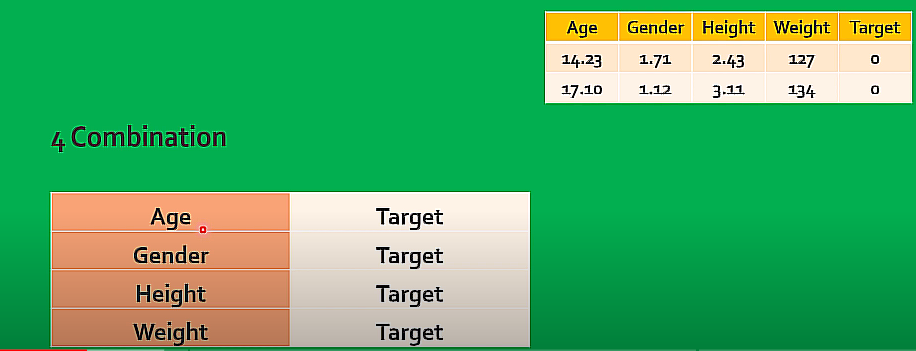

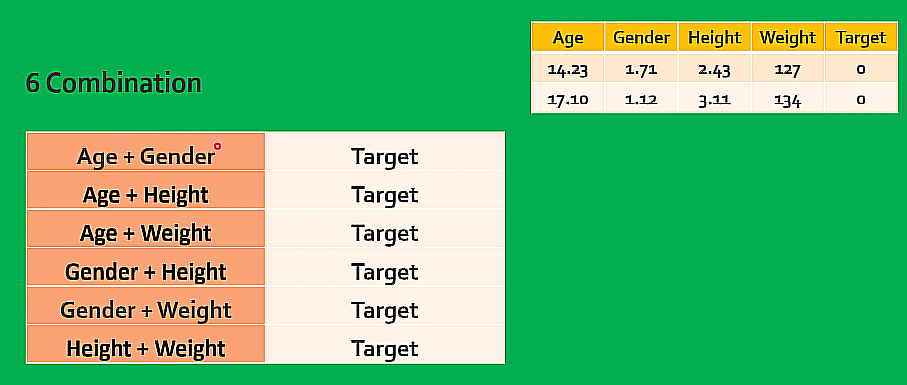

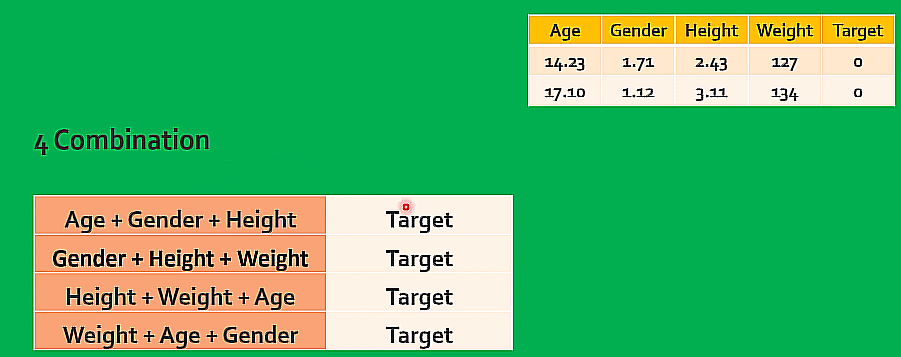

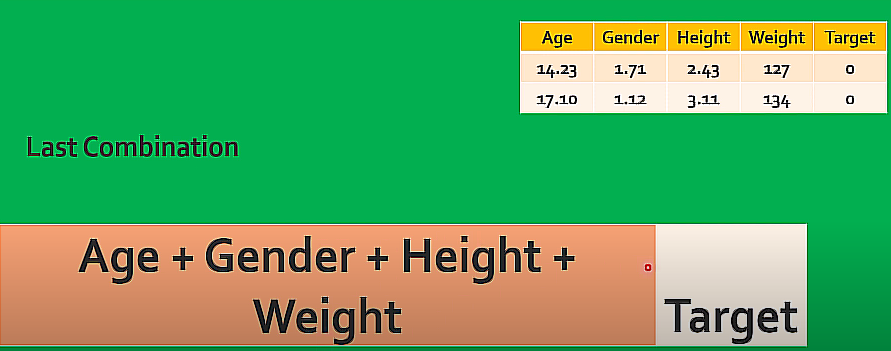

In [117]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [118]:
df6 = pd.read_csv('sampledata.csv')
df6

,age,gender,height,weight,target
0,1.71,1,15.6,127,0
1,1.78,1,11.2,100,0
2,2.36,0,18.6,101,0
3,1.95,1,16.8,113,0
4,2.59,0,21.0,118,0
...,...,...,...,...,...
173,5.65,0,20.5,95,2
174,3.91,0,23.0,102,2
175,4.28,0,20.0,120,2
176,2.59,0,20.0,120,2


In [119]:
df6.dtypes

age       float64
gender      int64
height    float64
weight      int64
target      int64
dtype: object

In [120]:
df6.isna().sum()

age       0
gender    0
height    0
weight    0
target    0
dtype: int64

In [121]:
df6.shape

(178, 5)

In [122]:
x6 = df6.iloc[:,0:4] # feature variable 
y6 = df6.iloc[:,-1] # target
print(x6)

      age  gender  height  weight
0    1.71       1    15.6     127
1    1.78       1    11.2     100
2    2.36       0    18.6     101
3    1.95       1    16.8     113
4    2.59       0    21.0     118
..    ...     ...     ...     ...
173  5.65       0    20.5      95
174  3.91       0    23.0     102
175  4.28       0    20.0     120
176  2.59       0    20.0     120
177  4.10       0    24.5      96

[178 rows x 4 columns]


In [123]:
print(y6)

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int64


In [124]:
x6_train,x6_test,y6_train,y6_test = train_test_split(x6,y6,test_size=0.3,random_state=1)

In [125]:
from sklearn.ensemble import RandomForestClassifier

In [126]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector

In [127]:
efs = ExhaustiveFeatureSelector(RandomForestClassifier(n_jobs=-1),min_features=1,max_features=4,scoring="accuracy",cv=2,n_jobs=-1).fit(x6_train,y6_train)

Features: 15/15

In [128]:
efs.best_feature_names_

('age', 'height', 'weight')

In [129]:
efs.best_score_

0.7741935483870968

In [130]:
efs.best_idx_

(0, 2, 3)

In [131]:
pd.DataFrame.from_dict(efs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
0,"(0,)","[0.5967741935483871, 0.6774193548387096]",0.637097,"(age,)",0.173494,0.040323,0.040323
1,"(1,)","[0.41935483870967744, 0.3870967741935484]",0.403226,"(gender,)",0.069398,0.016129,0.016129
2,"(2,)","[0.3548387096774194, 0.4838709677419355]",0.419355,"(height,)",0.27759,0.064516,0.064516
3,"(3,)","[0.43548387096774194, 0.4838709677419355]",0.459677,"(weight,)",0.104096,0.024194,0.024194
4,"(0, 1)","[0.5161290322580645, 0.5]",0.508065,"(age, gender)",0.034699,0.008065,0.008065
5,"(0, 2)","[0.6451612903225806, 0.7741935483870968]",0.709677,"(age, height)",0.27759,0.064516,0.064516
6,"(0, 3)","[0.7419354838709677, 0.7741935483870968]",0.758065,"(age, weight)",0.069398,0.016129,0.016129
7,"(1, 2)","[0.43548387096774194, 0.5483870967741935]",0.491935,"(gender, height)",0.242892,0.056452,0.056452
8,"(1, 3)","[0.5, 0.5]",0.5,"(gender, weight)",0.0,0.0,0.0
9,"(2, 3)","[0.6290322580645161, 0.6774193548387096]",0.653226,"(height, weight)",0.104096,0.024194,0.024194


## <font color = yellow> L1 Regularization

L1 regularization, also known as Lasso regularization, is a technique used in machine learning and statistics to prevent overfitting and select important features in a dataset. It adds a penalty term to the cost function of a linear regression model, which encourages the model to select a smaller number of features by driving the coefficients of the less important features towards zero.<br><br>
The L1 regularization penalty is proportional to the absolute value of the coefficients of the model, which leads to a sparse solution where many of the coefficients are zero. This makes L1 regularization particularly useful for feature selection in high-dimensional datasets where only a small number of features are relevant.

In Python, L1 regularization can be implemented using the Lasso class from the scikit-learn library. Here is an example:

In [132]:
from sklearn.linear_model import Lasso

# create a Lasso object with regularization parameter alpha
lasso = Lasso(alpha=0.1)

# fit the Lasso model on the training data
lasso.fit(x3_train, y3_train)

# print the coefficients of the Lasso model
print(lasso.coef_)

[-2.31436150e+02 -1.66006722e+02  4.68663651e-01  1.90642610e+04
  6.25578937e+03  3.61020748e+02 -2.90229559e+01  4.10970796e+01
  1.08669979e+01  8.09606585e+00 -9.34250261e-01 -5.09628204e-01
  6.09913708e+01  5.05860848e+01  2.58468365e+01  6.46880284e+00
  9.99488440e+03  2.53236739e+03  5.51848454e+03 -2.09665498e+03
 -1.17859142e+04 -2.40589242e+04  4.95764253e+03  4.44489926e+02
 -1.66976622e+01  2.06418309e+04 -1.77020037e+01  2.38738137e+01
  2.88237153e+01  1.17430179e+01  4.90984185e+01  6.92954375e+01
 -6.64750881e+01 -9.01932970e+00 -8.31843722e+01 -8.74964319e+02]


c:\Users\LH\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.640e+10, tolerance: 5.794e+08
  model = cd_fast.enet_coordinate_descent(


In [133]:
df7 = pd.read_csv('wine.csv')
df7

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [134]:
df7.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [135]:
x7 = df7.iloc[:,0:13]
y7 = df7.iloc[:,-1]
print(x7)

     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6        127           2.80   
1      13.20        1.78  2.14               11.2        100           2.65   
2      13.16        2.36  2.67               18.6        101           2.80   
3      14.37        1.95  2.50               16.8        113           3.85   
4      13.24        2.59  2.87               21.0        118           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5         95           1.68   
174    13.40        3.91  2.48               23.0        102           1.80   
175    13.27        4.28  2.26               20.0        120           1.59   
176    13.17        2.59  2.37               20.0        120           1.65   
177    14.13        4.10  2.74               24.5         96           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyan

In [136]:
y7

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int64

In [137]:
x7_train,x7_test,y7_train,y7_test = train_test_split(x7,y7,test_size=0.3,random_state=100)

In [138]:
x7_train

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
131,12.88,2.99,2.40,20.0,104,1.30,1.22,0.24,0.83,5.40,0.74,1.42,530
140,12.93,2.81,2.70,21.0,96,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600
12,13.75,1.73,2.41,16.0,89,2.60,2.76,0.29,1.81,5.60,1.15,2.90,1320
16,14.30,1.92,2.72,20.0,120,2.80,3.14,0.33,1.97,6.20,1.07,2.65,1280
116,11.82,1.47,1.99,20.8,86,1.98,1.60,0.30,1.53,1.95,0.95,3.33,495
...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,11.65,1.67,2.62,26.0,88,1.92,1.61,0.40,1.34,2.60,1.36,3.21,562
103,11.82,1.72,1.88,19.5,86,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415
67,12.37,1.17,1.92,19.6,78,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510
24,13.50,1.81,2.61,20.0,96,2.53,2.61,0.28,1.66,3.52,1.12,3.82,845


In [139]:
x7_train.shape

(124, 13)

In [140]:
x7_test

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
88,11.64,2.06,2.46,21.6,84,1.95,1.69,0.48,1.35,2.800000,1.00,2.75,680
159,13.48,1.67,2.64,22.5,89,2.60,1.10,0.52,2.29,11.750000,0.57,1.78,620
11,14.12,1.48,2.32,16.8,95,2.20,2.43,0.26,1.57,5.000000,1.17,2.82,1280
74,11.96,1.09,2.30,21.0,101,3.38,2.14,0.13,1.65,3.210000,0.99,3.13,886
158,14.34,1.68,2.70,25.0,98,2.80,1.31,0.53,2.70,13.000000,0.57,1.96,660
149,13.08,3.90,2.36,21.5,113,1.41,1.39,0.34,1.14,9.400000,0.57,1.33,550
99,12.29,3.17,2.21,18.0,88,2.85,2.99,0.45,2.81,2.300000,1.42,2.83,406
96,11.81,2.12,2.74,21.5,134,1.60,0.99,0.14,1.56,2.500000,0.95,2.26,625
90,12.08,1.83,2.32,18.5,81,1.60,1.50,0.52,1.64,2.400000,1.08,2.27,480
95,12.47,1.52,2.20,19.0,162,2.50,2.27,0.32,3.28,2.600000,1.16,2.63,937


In [141]:
x7_test.shape

(54, 13)

In [142]:
x7_train.shape, x7_test.shape

((124, 13), (54, 13))

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

In [144]:
sel = SelectFromModel(LogisticRegression(penalty="l1",C=0.1,solver='liblinear'))
sel

SelectFromModel(estimator=LogisticRegression(C=0.1, penalty='l1',
                                             solver='liblinear'))

In [145]:
sel.fit(x7_train,y7_train)

SelectFromModel(estimator=LogisticRegression(C=0.1, penalty='l1',
                                             solver='liblinear'))

In [146]:
sel.get_feature_names_out()

array(['alcohol', 'malic_acid', 'alcalinity_of_ash', 'magnesium',
       'flavanoids', 'color_intensity', 'proline'], dtype=object)

In [147]:
len(sel.get_feature_names_out())

7

In [148]:
x7_train.shape

(124, 13)

In [149]:
sel.get_support()

array([ True,  True, False,  True,  True, False,  True, False, False,
        True, False, False,  True])

In [150]:
x7_train1 = sel.transform(X=x7_train)
x7_test1 = sel.transform(X=x7_test)

In [151]:
print('The order of matrix ',x7_test1.shape,'\n')
print(x7_train1)

The order of matrix  (54, 7) 

[[1.288e+01 2.990e+00 2.000e+01 1.040e+02 1.220e+00 5.400e+00 5.300e+02]
 [1.293e+01 2.810e+00 2.100e+01 9.600e+01 5.000e-01 4.600e+00 6.000e+02]
 [1.375e+01 1.730e+00 1.600e+01 8.900e+01 2.760e+00 5.600e+00 1.320e+03]
 [1.430e+01 1.920e+00 2.000e+01 1.200e+02 3.140e+00 6.200e+00 1.280e+03]
 [1.182e+01 1.470e+00 2.080e+01 8.600e+01 1.600e+00 1.950e+00 4.950e+02]
 [1.272e+01 1.810e+00 1.880e+01 8.600e+01 2.530e+00 3.900e+00 7.140e+02]
 [1.299e+01 1.670e+00 3.000e+01 1.390e+02 2.890e+00 3.350e+00 9.850e+02]
 [1.270e+01 3.550e+00 2.150e+01 1.060e+02 1.200e+00 5.000e+00 6.000e+02]
 [1.421e+01 4.040e+00 1.890e+01 1.110e+02 2.650e+00 5.240e+00 1.080e+03]
 [1.207e+01 2.160e+00 2.100e+01 8.500e+01 2.650e+00 2.760e+00 3.780e+02]
 [1.267e+01 9.800e-01 1.800e+01 9.900e+01 1.940e+00 2.620e+00 4.500e+02]
 [1.378e+01 2.760e+00 2.200e+01 9.000e+01 6.800e-01 9.580e+00 6.150e+02]
 [1.243e+01 1.530e+00 2.150e+01 8.600e+01 3.150e+00 3.940e+00 3.520e+02]
 [1.383e+01 1.650e+0

In [152]:
print(x7_test1)

[[1.164000e+01 2.060000e+00 2.160000e+01 8.400000e+01 1.690000e+00
  2.800000e+00 6.800000e+02]
 [1.348000e+01 1.670000e+00 2.250000e+01 8.900000e+01 1.100000e+00
  1.175000e+01 6.200000e+02]
 [1.412000e+01 1.480000e+00 1.680000e+01 9.500000e+01 2.430000e+00
  5.000000e+00 1.280000e+03]
 [1.196000e+01 1.090000e+00 2.100000e+01 1.010000e+02 2.140000e+00
  3.210000e+00 8.860000e+02]
 [1.434000e+01 1.680000e+00 2.500000e+01 9.800000e+01 1.310000e+00
  1.300000e+01 6.600000e+02]
 [1.308000e+01 3.900000e+00 2.150000e+01 1.130000e+02 1.390000e+00
  9.400000e+00 5.500000e+02]
 [1.229000e+01 3.170000e+00 1.800000e+01 8.800000e+01 2.990000e+00
  2.300000e+00 4.060000e+02]
 [1.181000e+01 2.120000e+00 2.150000e+01 1.340000e+02 9.900000e-01
  2.500000e+00 6.250000e+02]
 [1.208000e+01 1.830000e+00 1.850000e+01 8.100000e+01 1.500000e+00
  2.400000e+00 4.800000e+02]
 [1.247000e+01 1.520000e+00 1.900000e+01 1.620000e+02 2.270000e+00
  2.600000e+00 9.370000e+02]
 [1.251000e+01 1.240000e+00 1.750000e+01

In [153]:
x7_train1.shape, x7_test1.shape

((124, 7), (54, 7))

In [154]:
glm = LogisticRegression()
glm.fit(X=x7_train1,y=y7_train)

c:\Users\LH\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [155]:
y7_pred = glm.predict(x7_test1)
y7_pred

array([1, 2, 0, 0, 2, 2, 1, 1, 1, 0, 2, 1, 2, 2, 2, 0, 0, 0, 1, 0, 2, 0,
       1, 1, 0, 0, 1, 1, 1, 2, 2, 1, 0, 1, 2, 2, 1, 1, 2, 1, 0, 2, 2, 2,
       0, 2, 2, 2, 0, 0, 0, 1, 0, 1], dtype=int64)

In [156]:
from sklearn.metrics import accuracy_score

In [157]:
accuracy_score(y7_test,y7_pred)

0.9259259259259259

## <font color = yellow> L2 Regularization

L2 regularization, also known as Ridge regression, is a technique used in machine learning to prevent overfitting by adding a penalty term to the loss function. This penalty term is proportional to the square of the magnitude of the coefficients. The main objective of L2 regularization is to keep the coefficients as small as possible, while still maintaining good predictive performance.<br>
The formula for the loss function with L2 regularization can be expressed as:<br>
loss = $ (1/n) * sum((y_i - y(pred_i))^2) + lambda * sum(w_i^2) $<br>
Where:<br>
- n is the number of samples
- y_i is the actual value of the i-th sample
- y_pred_i is the predicted value of the i-th sample
- w_i is the i-th coefficient of the model
- lambda is the regularization strength hyperparameter<br>
==> The regularization strength hyperparameter, lambda, is a tuning parameter that determines the amount of regularization applied to the model. A higher value of lambda will result in more regularization, and thus smaller coefficients.<br>
==> In Python, L2 regularization can be implemented using the Ridge regression model from the scikit-learn library. Here is an example:

<font color = yellow> Useful of L2 Regularization

L2 regularization, also known as Ridge regression, is a technique used to prevent overfitting in machine learning models by adding a penalty term to the cost function. The penalty term is the square of the L2 norm of the model's coefficient vector multiplied by a regularization parameter, which is a hyperparameter that controls the strength of the regularization.

The useful of L2 regularization are:
+ Helps prevent overfitting: L2 regularization adds a penalty term to the cost function that penalizes large coefficient values, making the model less complex and reducing the risk of overfitting.
+ Improves model generalization: By reducing overfitting, L2 regularization can improve a model's ability to generalize to new, unseen data.
+ Stabilizes model training: L2 regularization can help stabilize the training process of the model by reducing the sensitivity of the model to small changes in the input data.
+ Works well with high-dimensional data: L2 regularization can be particularly useful when working with high-dimensional data, where the number of features is much larger than the number of samples.
+ Can handle multicollinearity: L2 regularization can handle multicollinearity, a common problem in regression analysis where two or more predictor variables are highly correlated.

In [158]:
from sklearn.linear_model import Ridge
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load Boston Housing dataset
boston = load_boston()

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=42)

# Initialize the Ridge regression model
ridge = Ridge(alpha=1.0)

# Fit the model to the training data
ridge.fit(X_train, y_train)

# Make predictions on the test data
y_pred = ridge.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)

# Print the mean squared error
print("Mean Squared Error:", mse)

Mean Squared Error: 24.47719122770867


c:\Users\LH\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Cal

In [159]:
df8 = pd.read_csv('wine.csv')
df8

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [160]:
df8.shape

(178, 14)

In [161]:
df8.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [162]:
df8.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [163]:
x8 = df8.iloc[:,0:13]
y8 = df8.iloc[:,-1]
print(x8)
print(y8)

     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6        127           2.80   
1      13.20        1.78  2.14               11.2        100           2.65   
2      13.16        2.36  2.67               18.6        101           2.80   
3      14.37        1.95  2.50               16.8        113           3.85   
4      13.24        2.59  2.87               21.0        118           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5         95           1.68   
174    13.40        3.91  2.48               23.0        102           1.80   
175    13.27        4.28  2.26               20.0        120           1.59   
176    13.17        2.59  2.37               20.0        120           1.65   
177    14.13        4.10  2.74               24.5         96           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyan

In [164]:
x8_train,x8_test,y8_train,y8_test = train_test_split(x8,y8,test_size=0.3,random_state=111)

In [165]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

In [166]:
sel = SelectFromModel(LogisticRegression(penalty='l2',C=5,solver='liblinear'))
sel

SelectFromModel(estimator=LogisticRegression(C=5, solver='liblinear'))

In [167]:
sel.fit(X=x8_train,y=y8_train)

SelectFromModel(estimator=LogisticRegression(C=5, solver='liblinear'))

In [168]:
sel.get_feature_names_out()

array(['malic_acid', 'flavanoids', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines'], dtype=object)

In [169]:
len(sel.get_feature_names_out())

5

In [170]:
sel.get_support()

array([False,  True, False, False, False, False,  True, False, False,
        True,  True,  True, False])

In [171]:
x8_train1 = sel.transform(x8_train)
x8_test1 = sel.transform(x8_test)

In [172]:
print(x8_train1)

[[ 0.98   1.94   2.62   1.23   3.16 ]
 [ 1.68   3.39   6.1    0.91   3.33 ]
 [ 1.59   3.93   8.7    1.23   2.82 ]
 [ 1.71   3.06   5.64   1.04   3.92 ]
 [ 1.21   2.65   4.6    1.19   2.3  ]
 [ 3.98   2.63   4.36   0.82   3.   ]
 [ 2.43   2.27   2.     0.9    2.78 ]
 [ 1.67   1.1   11.75   0.57   1.78 ]
 [ 1.92   3.14   6.2    1.07   2.65 ]
 [ 1.81   2.91   7.3    1.28   2.88 ]
 [ 2.46   0.66   7.1    0.73   1.58 ]
 [ 3.37   0.66  10.26   0.72   1.75 ]
 [ 1.86   2.88   3.8    1.11   4.   ]
 [ 2.59   0.68   9.3    0.6    1.62 ]
 [ 1.73   1.92   2.94   1.04   3.57 ]
 [ 3.43   1.64   1.28   0.93   3.05 ]
 [ 3.55   1.2    5.     0.78   1.29 ]
 [ 2.51   0.7    9.7    0.62   1.71 ]
 [ 1.64   2.68   4.6    1.09   2.78 ]
 [ 3.03   0.58   7.5    0.67   1.73 ]
 [ 3.9    1.39   9.4    0.57   1.33 ]
 [ 1.1    1.09   3.27   1.25   1.67 ]
 [ 1.39   2.29   2.9    0.93   3.19 ]
 [ 1.9    2.79   6.3    1.13   2.93 ]
 [ 1.47   1.6    1.95   0.95   3.33 ]
 [ 2.83   2.25   2.15   1.15   3.3  ]
 [ 1.35   1.

In [173]:
print(x8_test1)

[[ 4.3       1.75      2.6       0.79      2.57    ]
 [ 3.86      1.59      4.8       0.84      2.01    ]
 [ 1.81      2.98      5.1       1.04      3.47    ]
 [ 3.12      1.57      8.6       0.59      1.3     ]
 [ 1.61      2.09      2.06      1.06      2.96    ]
 [ 4.95      0.8       4.4       0.91      2.05    ]
 [ 1.83      1.5       2.4       1.08      2.27    ]
 [ 4.31      3.03      2.8       0.75      3.64    ]
 [ 3.7       0.92     10.68      0.85      1.56    ]
 [ 1.48      2.43      5.        1.17      2.82    ]
 [ 2.67      1.36     10.8       0.48      1.47    ]
 [ 2.4       2.79      3.25      0.8       3.39    ]
 [ 2.08      2.17      3.3       1.27      2.96    ]
 [ 1.75      3.74      7.05      1.01      3.26    ]
 [ 1.6       2.37      3.93      1.09      3.63    ]
 [ 1.35      3.15      7.22      1.01      3.55    ]
 [ 5.04      0.34      4.9       0.58      1.33    ]
 [ 1.07      3.75      4.5       1.04      2.77    ]
 [ 3.45      0.7       5.28      0.68      1.7

In [174]:
x8_train1.shape, x8_train.shape

((124, 5), (124, 13))

In [175]:
glm = LogisticRegression()
glm.fit(X=x8_train1,y=y8_train)

LogisticRegression()

In [176]:
y8_pred = glm.predict(x8_test1)
y8_pred

array([1, 2, 0, 2, 1, 2, 1, 0, 2, 0, 2, 1, 1, 0, 0, 0, 2, 0, 2, 1, 1, 0,
       0, 2, 0, 2, 1, 2, 1, 0, 0, 1, 0, 0, 2, 0, 1, 1, 2, 2, 0, 2, 1, 1,
       1, 2, 1, 0, 1, 0, 0, 0, 1, 2], dtype=int64)

In [177]:
from sklearn.metrics import accuracy_score

In [178]:
accuracy_score(y8_test,y8_pred)

0.8518518518518519

## <font color = yellow> Stepwise Selection

Stepwise selection is a method used to select the most important variables to include in a statistical model. It is a type of feature selection technique that helps in reducing the number of predictor variables to only the most significant ones.<br>
There are two types of stepwise selection techniques:<br>
+ Forward stepwise selection: This technique starts with no predictors and sequentially adds predictors to the model based on their statistical significance. The process continues until no additional predictors meet the predetermined criteria for inclusion.
+ Backward stepwise selection: This technique starts with all predictors in the model and sequentially removes them one by one based on their statistical significance until no additional predictors meet the predetermined criteria for exclusion.<br>
Stepwise selection can be performed using various statistical software packages such as R and Python. Here is an example of performing forward stepwise selection using Python:

In [179]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load data
df = pd.read_csv('wine.csv')

# Define predictors and target variable
X = df.drop('target', axis=1)
y = df['target']

# Define initial model with no predictors
model = sm.OLS(y, np.ones(len(y))).fit()

# Perform forward stepwise selection
for i in X.columns:
    temp_model = sm.OLS(y, sm.add_constant(X.loc[:, [i]])).fit()
    if temp_model.aic < model.aic:
        model = temp_model
        predictors = list(model.params.index[1:])

# Print selected predictors and their coefficients
print("Selected predictors:", predictors)
print("Coefficients:", model.params[1:])

Selected predictors: ['flavanoids']
Coefficients: flavanoids   -0.657591
dtype: float64


# <p style = 'text-align:center'><font color = yellow>The End